In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Exploratory Data Analysis


In [7]:
# use filtered data with no outliers
df = pd.read_csv('2018_filtered.csv', index_col=False)
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,2.636746e+09,103792000.0,-0.004,-0.02910,0.673,190855000.0,0.0000,0.0,-26.687113,0,Technology
1,5.361960e+09,853769000.0,0.073,-0.25870,-8.191,523610000.0,0.0000,0.0,-42.583392,0,Consumer Cyclical
2,1.798500e+09,412100000.0,-0.158,-0.07130,4.204,404200000.0,0.0085,13000000.0,66.143385,1,Basic Materials
3,5.816440e+08,479440000.0,0.284,0.17450,4.448,427656000.0,0.0000,29000.0,-9.197867,0,Energy
4,1.589000e+09,84532000.0,0.044,0.07485,9.939,303107000.0,0.0000,0.0,100.552499,1,Basic Materials
...,...,...,...,...,...,...,...,...,...,...,...
1726,6.966000e+06,3331000.0,0.305,0.06250,18.620,4573000.0,0.0193,0.0,11.671183,1,Financial Services
1727,2.307974e+07,6089738.0,0.080,0.06010,9.580,2302113.0,0.0000,0.0,-3.076927,0,Consumer Defensive
1728,3.546600e+07,5710000.0,0.031,0.01090,5.464,6593000.0,0.0000,0.0,27.118650,1,Consumer Cyclical
1729,0.000000e+00,2986000.0,0.044,0.35880,1.618,-816000.0,0.0000,38000.0,-22.159090,0,Healthcare


## 2.1 Group by Sector

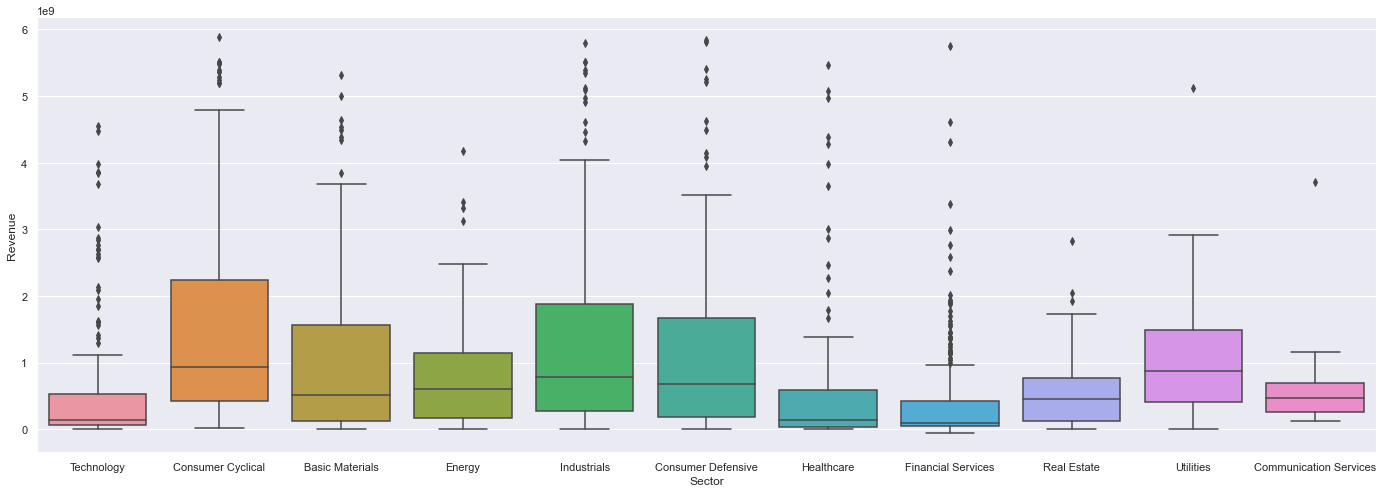

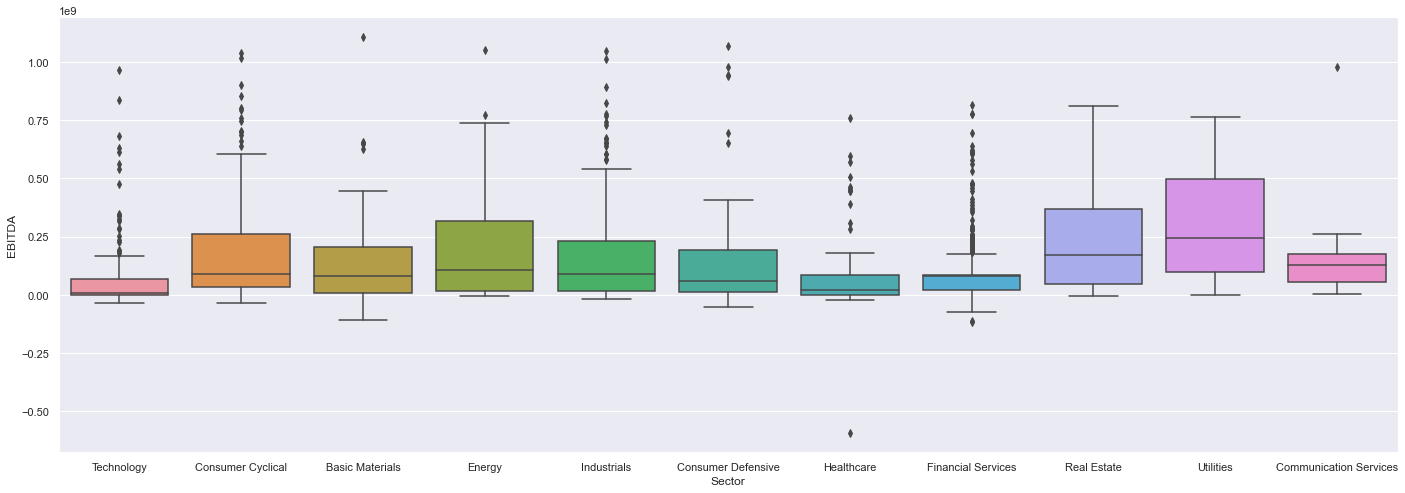

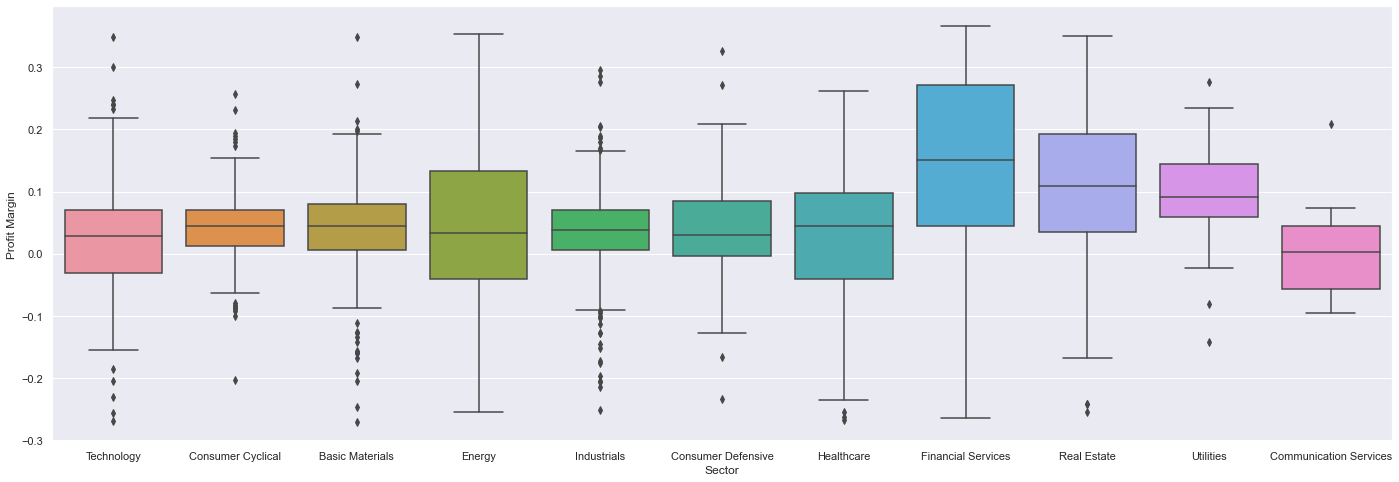

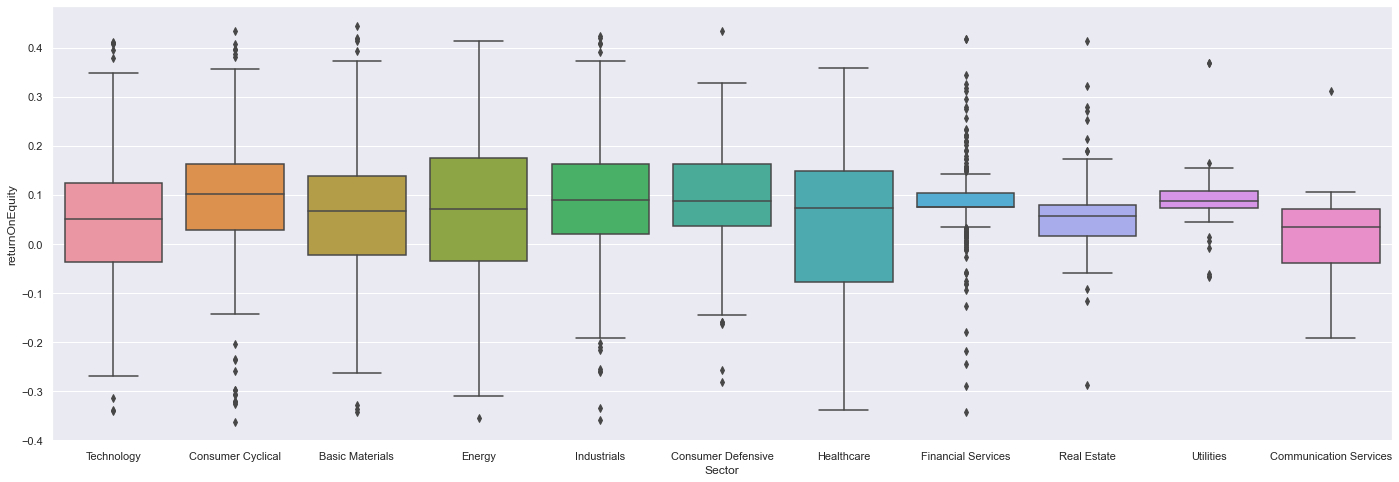

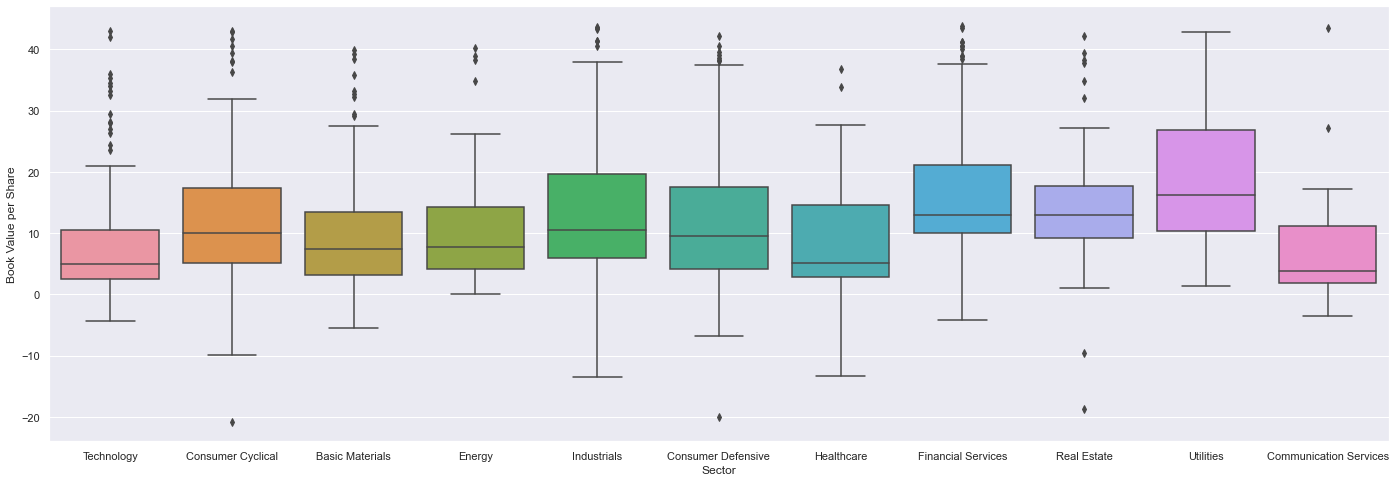

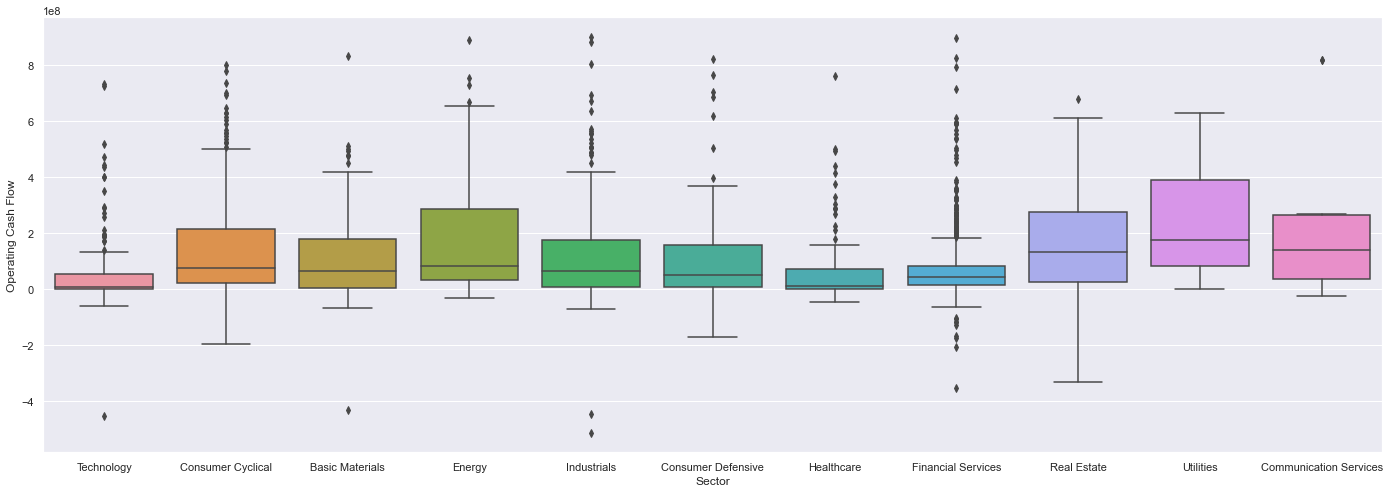

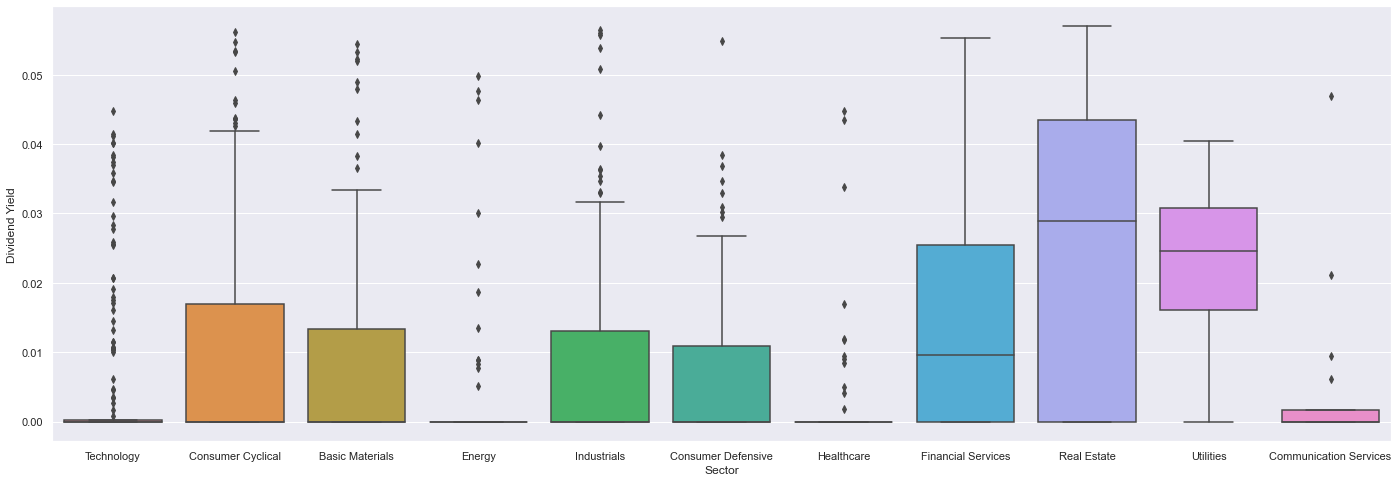

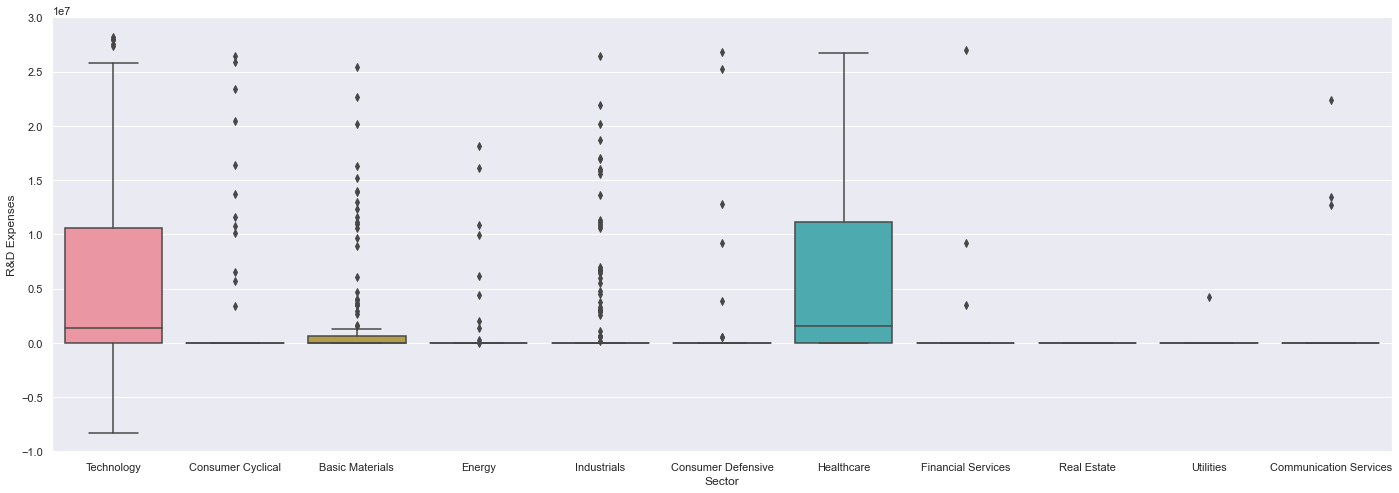

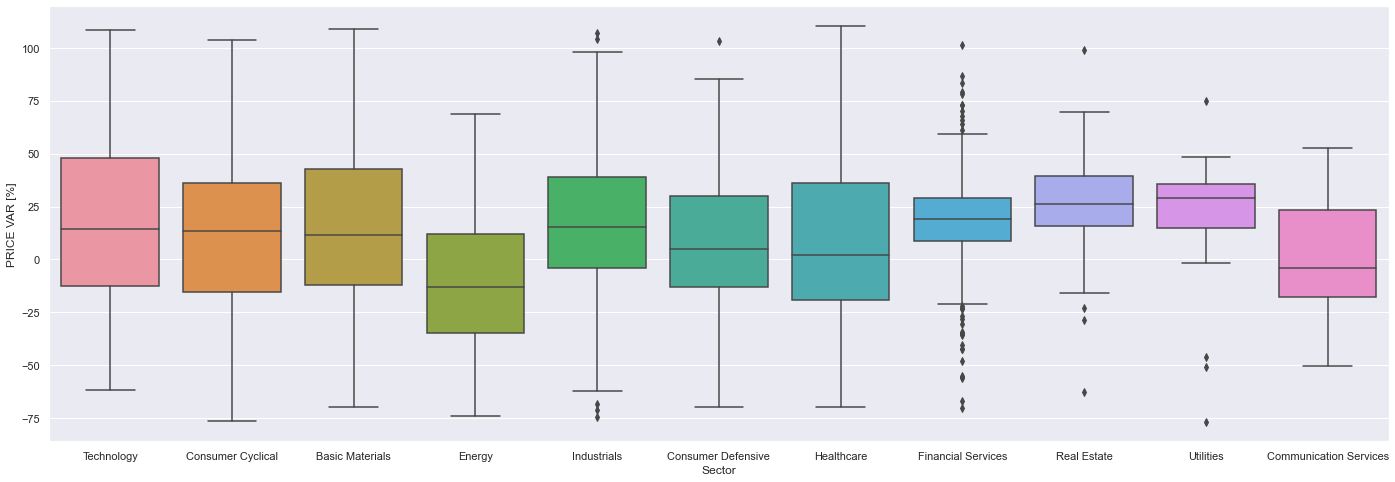

In [8]:
for factor in df.columns[0:-2]:
    f, axes = plt.subplots(1, 1, figsize=(24,8))
    sns.boxplot(x = 'Sector', y = factor, data = df, ax = axes)

In [9]:
# find percentage of stock that has 'buy' rating (Class = 1, PRICE VAR [%] > 0) in each Sector
for sector in df['Sector'].unique():
    buy_count = len(df.loc[(df['Class'] == 1) & (df['Sector'] == sector)])
    total_size = len(df.loc[df['Sector'] == sector])
    print(f'{sector} {round(100 * buy_count / total_size, 2)}%')

Technology 63.37%
Consumer Cyclical 61.09%
Basic Materials 63.08%
Energy 36.23%
Industrials 72.2%
Consumer Defensive 58.95%
Healthcare 52.87%
Financial Services 86.4%
Real Estate 90.0%
Utilities 89.47%
Communication Services 43.75%


## 2.2 Correlation Matrix

<AxesSubplot:>

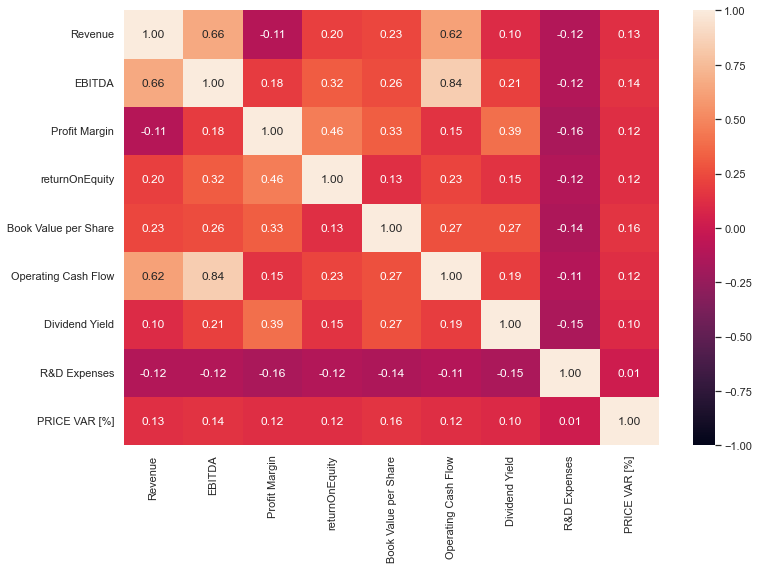

In [10]:
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.iloc[:, :-2].corr(), vmin = -1, vmax = +1, annot=True, fmt='.2f')

There is no strong correlation between one specific indicator with PRICE VAR [%].
So we will use ML models to only predict Buy/Sell (Class = 1/0) from these indicators.